<div class="alert alert-block" style="color: skyblue">
    <h1><center> DAKD 2024 EXERCISE 3: UNSUPERVISED LEARNING  </center></h1>

### <font color = skyblue> *** FILL YOUR INFORMATION BELOW *** </font>
(Name) Otso Santala <br>
(Student number) 2110554 <br>
(UTU email) ojsant@utu.fi <br>
(Date) 12.12.2024 <br>

___
#### General Guidance for Exercises

- **Complete all tasks**: Make sure to answer all questions, even if you cannot get your script to fully work.
- **Code clarity**: Write clear and readable code. Include comments to explain what your code does.
- **Effective visualizations**: Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- **Notebook organization**: You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- **Submission**: Submit both the `.ipynb` and `.html` or `.pdf` versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- **Grading criteria**:
    - The grading scale is *Fail/Pass/Pass with honors* (+1).
    - To pass, you must complete the required parts 0-3.
    - To achieve *Pass with honors*, complete the bonus exercises.
- **Technical issues**:
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at konsta.k.nyman@utu.fi or antti.s.vasankari@utu.fi.
- **Use of AI and large language models**:
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- **Time management**: Do not leave your work until the last moment. No feedback will be available during weekends.

**Additional Notes**:
- You can find the specific deadlines and session times for each assignment on the Moodle course page.
- Ensure all your answers are concise—typically a few sentences per question.
- Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
<br><br>
___

#### Exercise instructions

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the seeds dataset, available on moodle as `seeds.csv`. The features are all numeric. They quantify the measurements related to the geometrical properties of wheat grains. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)

<br>


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods. **REMEMBER, this step can never be neglected in the real world.** <br><br>
___

#### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [1]:
import itertools # has some utilities that may be useful in the exercise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the **Moodle** page of this course. (`seeds.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
data = pd.read_csv('seeds.csv')
data.head()

,area,perimeter,compactness,length,width,asymmetry_coef,length_groove
0,18.45,16.12,0.8921,6.107,3.769,2.235,5.794
1,11.41,12.95,0.8560,5.090,2.775,4.957,4.825
2,10.79,12.93,0.8107,5.317,2.648,5.462,5.194
3,18.14,16.12,0.8772,6.059,3.563,3.619,6.011
4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Explain briefly why this is important.
 - For visualization, project the data to two dimensions by using principal component analysis (PCA).
 - **These PCs are solely used for plotting the data.** The clusterings are done on the original standardized features.

In [ ]:
scaler = StandardScaler()

data_transf = scaler.fit_transform(data)

pca_transformer = PCA(n_components=2)   # we use the same transformer later so save to a variable

p_comps = pca_transformer.fit_transform(data_transf)


<div style="color: skyblue;">
Scaling is important because the units of the measurements are unknown. This could lead to some features getting "squashed", e.g. when two closely related features (=have the same true scale) are represented with different units with different scales, the underlying structure of the data is lost. Z-score scaling (i.e. standardization) is done to ensure that every feature has the same "unit".

 - Visualize the resulting two-dimensional data in a scatter plot.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

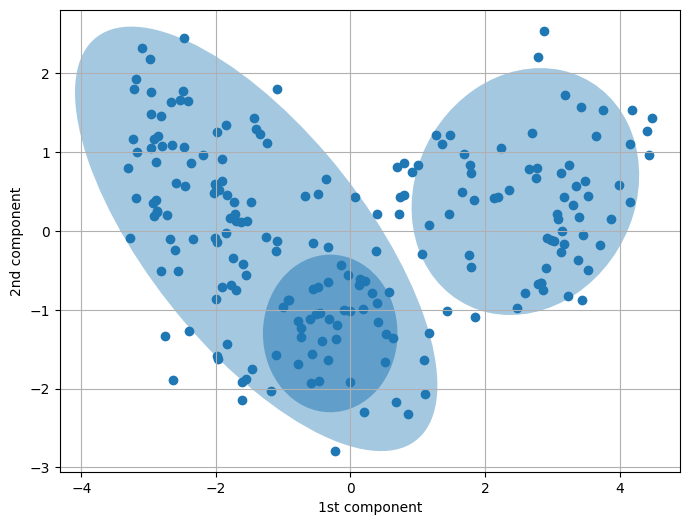

In [4]:
fig, axs = plt.subplots(figsize=(8,6))


axs.scatter(p_comps[:,0], p_comps[:,1])
axs.grid(visible=True)
axs.set_xlabel("1st component")
axs.set_ylabel("2nd component")

l_ellipse = Ellipse([-1.4,-0.1], 7, 3, angle=-45)
l_ellipse.set_alpha(0.4)
r_ellipse = Ellipse([2.6,0.5], 3.5, 3, angle=30)
r_ellipse.set_alpha(0.4)
b_ellipse = Ellipse([-0.3,-1.3], 2,2)
b_ellipse.set_alpha(0.5)
axs.add_patch(l_ellipse)
axs.add_patch(r_ellipse)
axs.add_patch(b_ellipse)

<div style="color: skyblue;">
There seems to be two clusters, one with slightly higher density on the left and one sparser on the right, although the exact boundary between the two is unclear. It could also be that the bottom part of the left cluster is its own cluster (the darker ellipse inside the larger one).

### Part 2a: Agglomerative hierarchical clustering theory
Explain briefly the different linkage criterion values.
- Single: <p style="color: skyblue;">the dissimilarity of two points in different clusters closest to each other.</p>
- Average: <p style="color: skyblue;">the average dissimilarity across all pairs between clusters</p>
- Complete: <p style="color: skyblue;">the dissimilarity of two points in different clusters farthest from each other</p>
- Ward: <p style="color: skyblue;">value based on optimal value of some objective function. Ward used sum of squared errors. (source: https://en.wikipedia.org/wiki/Ward%27s_method). Same is used in sklearn.</p>

Explain the **silhouette coefficient** (silhouette_score).

<div style="color: skyblue;">
Silhouette coefficient tells how well a sample point corresponds to the cluster. It is calculated as the difference between mean nearest cluster distance (distance between the sample point vs points of the nearest cluster excluding the point's cluster) and mean intracluster distance (distance between a point and points of its own cluster) divided by the maximum of the two. Positive values tell that a point is more similar to its cluster than to other clusters whereas a negative value tells that a point is probably more similar to another cluster than the one it is assigned to. 'silhouette_score' returns the mean silhouette coefficient across all sample points.

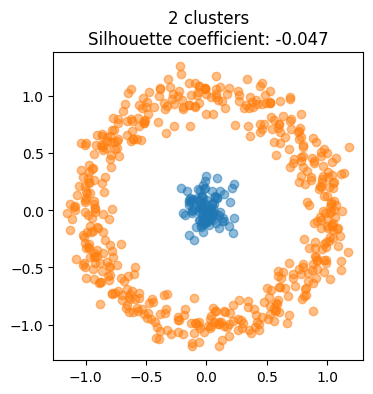

In [5]:
n = 2
no_in = 100
no_out = 500
labels = np.concatenate((np.zeros(no_in), np.ones(no_out)))

inner_cluster = np.random.randn(no_in, 2)*0.1
theta = np.linspace(0, 2*np.pi, no_out)
outer_cluster = np.array([np.cos(theta), np.sin(theta)]).T + np.random.randn(no_out, 2)*0.1
data = np.vstack((inner_cluster, outer_cluster))

score = silhouette_score(data, labels)

plt.figure(figsize=(4, 4))
plt.title(f'{n} clusters\nSilhouette coefficient: {score:.3f}')
for c in range(n):
    plt.scatter(data[labels==c, 0], data[labels==c, 1], alpha=0.5)
    
plt.show()

In the figure above, why is the silhouette coefficient close to zero even though the clusters are clearly distinct?
 
(Optional) What would be a better way to assess this clustering?

 <div style="color: skyblue;">There are 500 points in the outer cluster compared to 100 in the center. Since the mean intracluster distance of the outer cluster points is for the most part larger than the mean distance to the inner cluster, the outer sample points have negative silhouette coefficients and thus the whole silhouette score is lowered.

### Part 2b: Agglomerative hierarchical clustering practice

Let's get back to the **seeds** dataset.

Cluster the standardized data into 2-10 clusters using agglomerative hierarchical clustering.
- Explore all combinations of the **number of clusters** (2-10) and the **linkage criteria**.
- Calculate the silhouette coefficient for each combination and store the results, as well as the predictions made by the clustering.

*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

In [6]:
# all available linkage criterion of AgglomerativeClustering
criteria = ["ward", "complete", "average", "single"]
scores = pd.DataFrame(index = range(2,11), columns=criteria)
pairs = itertools.product(range(2,11), criteria)
predictions = {}

for k, criterion in pairs:
    clust = AgglomerativeClustering(n_clusters=k, linkage=criterion)

    # cluster labels of each sample
    labels = clust.fit_predict(data_transf)

    # store silhouette scores to a dataframe for easy viewing
    scores.loc[k, criterion] = silhouette_score(data_transf, labels)
    
    # store labels of each clustering to a dictionary with the corresponding tuple as key 
    predictions[(k, criterion)] = labels
    


- Use the silhouette score to determine the best linkage criterion for each number of clusters (2-10).
- For each number of clusters, display the best linkage criterion and the silhouette score, sorted by the score (high to low) as follows:

| Number of clusters | Linkage criterion | Silhouette score
| --- | --- | ---   

In [7]:
table = pd.DataFrame()
for k, criterion in itertools.product(range(2,11), criteria):
    score = scores.loc[k, criterion]
    table = pd.concat([table, pd.Series([k, criterion, score])], axis=1)

# This is a mess but only done to get proper format
table = table.T.rename(columns={0:'Number of clusters', 1:'Linkage criterion', 2:'Silhouette score'})
table = table.reset_index()
table.pop('index')
# Sort values in by descending silhouette score
table = table.sort_values(by='Silhouette score', ascending=False)
table

,Number of clusters,Linkage criterion,Silhouette score
0,2,ward,0.461297
1,2,complete,0.451995
2,2,average,0.441339
4,3,ward,0.392634
6,3,average,0.375957
10,4,average,0.354864
5,3,complete,0.350198
9,4,complete,0.314857
8,4,ward,0.300576
13,5,complete,0.29372


 - Plot four clusterings with **three clusters**, one of each **linkage criterion**, as scatter plots.
 - Again, use the first two PCs for visualization. 
 - Colour the datapoints according to the clusters they were assigned to.
 - The structure of the plot is provided

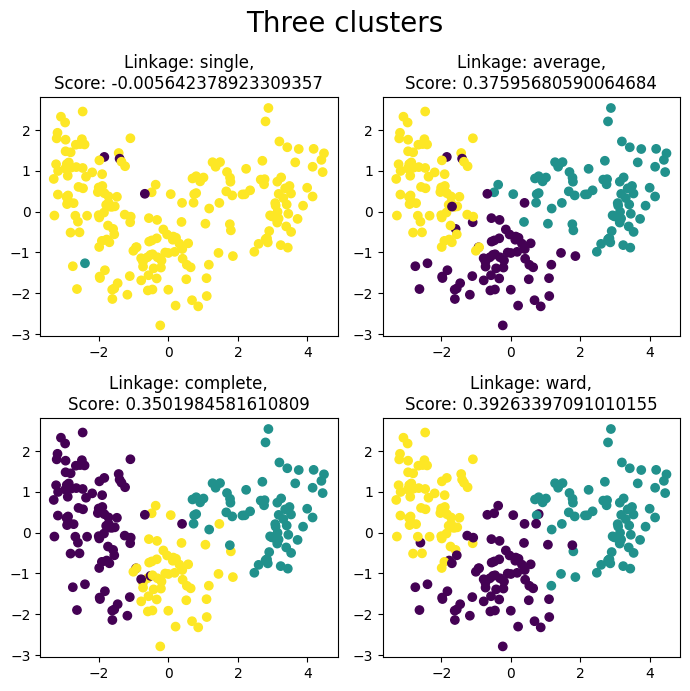

In [8]:
# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Three clusters", fontsize=20)

linkage_criteria = ["single", "average", "complete", "ward"]

axes = axes.flatten() # creates a single array from a 2D-matrix

for i, ax in enumerate(axes):
    ax.scatter(x=p_comps[:,0], y=p_comps[:,1], c=predictions[(3, linkage_criteria[i])])
    ax.set_title(f"Linkage: {linkage_criteria[i]},\nScore: {scores.loc[3, linkage_criteria[i]]}")

plt.tight_layout()

 - Similarly, from the clusterings using **'ward'** linkage criterion, plot the four clusterings of best performing **number of clusters** as scatter plots.

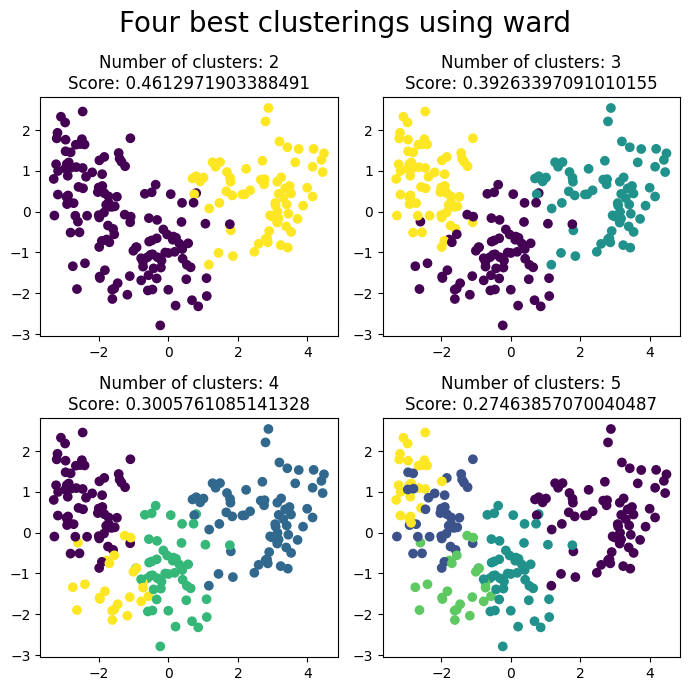

In [9]:
# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Four best clusterings using ward", fontsize=20)

axes = axes.flatten() # creates a single array from a 2D-matrix

# Couldn't figure out a general way to do this. Could probably encode criteria so that ward gets the largest value
# and then use df.nlargest method or something similar
best_ones = [2,3,4,5]

for i, ax in enumerate(axes):
    ax.scatter(x=p_comps[:,0], y=p_comps[:,1], c=predictions[(best_ones[i], "ward")])
    ax.set_title(f"Number of clusters: {best_ones[i]}\nScore: {scores.loc[best_ones[i],"ward"]}")

plt.tight_layout()

Think about the clusters you see and how the choice of the linkage criterion and the number of clusters affected the formation of clusters. No need to write an answer.

Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? Which ones? It's absolutely fine if they don't.

<div style="color: skyblue;">
The two cluster plot has pretty much the exact same clusters as I estimated previously. The third cluster was a bit larger than I anticipated but roughly in the same spot.

### Part 3: _k_-means clustering

- Perform _k_-means clustering on the standardized data. Try 2-10 numbers of clusters.
- Evaluate the clustering performance using the silhouette coefficient.
- Store the centroids of the clusters

In [14]:
kmeans_preds = pd.DataFrame(columns=range(2,11))
centroids = {}
silhouettes = pd.Series(index=range(2,11))

for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data_transf)
    kmeans_preds[k] = pd.Series(labels)
    centroids[k] = kmeans.cluster_centers_
    silhouettes[k] = silhouette_score(data_transf, labels)

# best clusterings
best_clusters = silhouettes.nlargest(4).index.to_numpy()   # index = k, numpy conversion for i index in the next part
best_clusters

array([2, 3, 4, 5])

 - Choose the four best numbers of clusters according to silhouette coefficient that you discovered above.
 - Once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot.
 - Remember to transform the centroids to the PCA space.
 - Explain why you need to transform the centroids.

<div style="color: skyblue;">
The centroids need to be transformed, since they are 7-dimensional and can't be visualized in the usual way. Same was done to the original sample points. Since the centroids represent the cluster centers calculated from these sample points, doing the same transformation to the centroids should have them land at the cluster centers in the 2D plot (because of linearity).

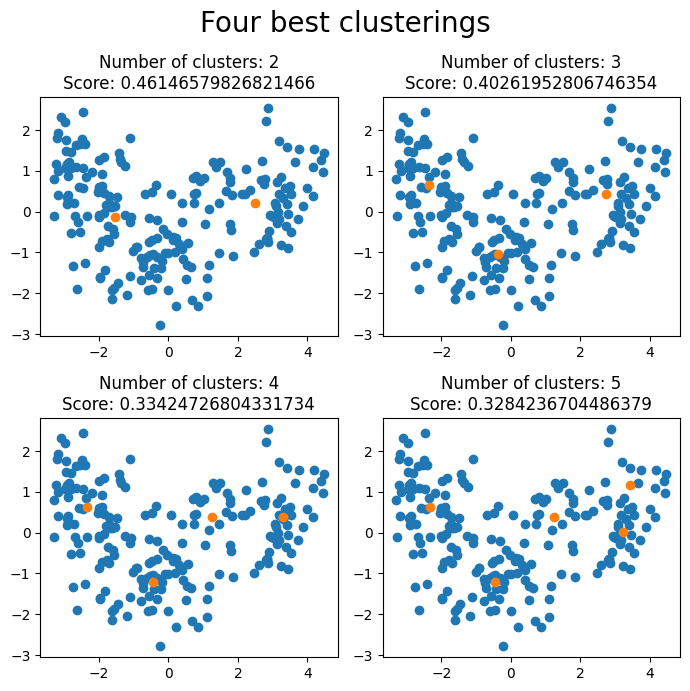

In [15]:
# centroid transformation to PCA using the previously fitted transformer
centroids_pca = {}
for k in centroids.keys():
    centroids_pca[k] = pca_transformer.transform(centroids[k])

# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Four best clusterings", fontsize=20)

axes = axes.flatten() # creates a single array from a 2D-matrix

for i, ax in enumerate(axes):
    ax.scatter(x=p_comps[:,0], y=p_comps[:,1]) # clusters
    ax.scatter(x=centroids_pca[best_clusters[i]][:,0], y=centroids_pca[best_clusters[i]][:,1]) # centroids
    ax.set_title(f"Number of clusters: {best_clusters[i]}\nScore: {silhouettes[best_clusters[i]]}")

plt.tight_layout()

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the wine dataset](https://archive.ics.uci.edu/dataset/109/wine). The features quantify chemical properties of wine, grown around the same area in Italy. They are divided to three different classes, simply called `1`, `2` and `3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `wine_missing_labels.csv`**


| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)

<br>

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

In [ ]:
# YOUR CODE

<div style="color: skyblue;">
YOUR ANSWER

Your task is to use clustering to assign labels to the rows that have a missing value as their label. Do this by first clustering all of the data, and then filling in the missing labels based on which clusters the data points with known labels tend to fit in. 

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process.

<br>

You are also given the full labels for the dataset in a separate file called `wine_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook without further understanding of it. 

*Hint: you should get something over 0.8*

In [ ]:
# YOUR CODE

<div style="color: skyblue;">
YOUR ANSWER